In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os, glob
print("cwd :", os.getcwd())
print("CSV trouvés :", glob.glob("results/*.csv"))

cwd : /Users/killianguillaume/Desktop/quant_bsde
CSV trouvés : ['results/grid_search_results.csv']


In [3]:
df = pd.read_csv('results/grid_search_results.csv')

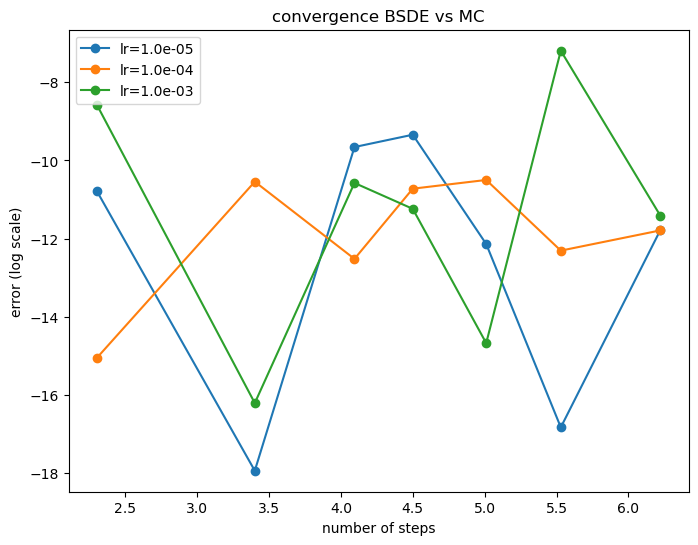

    n_steps       lr     price  mc_price  final_loss           err     mc_ci  \
5        30  0.00001  0.126042  0.125915    0.012050  1.622063e-08  0.003188   
17      252  0.00001  0.135452  0.135673    0.009179  4.919031e-08  0.003180   
3        30  0.00100  0.121604  0.121907    0.008379  9.155195e-08  0.003204   
1        10  0.00010  0.115197  0.114658    0.014473  2.903254e-07  0.003250   
12      150  0.00100  0.133779  0.134430    0.010915  4.239005e-07  0.003182   
7        60  0.00010  0.130533  0.128620    0.011528  3.656932e-06  0.003166   
16      252  0.00010  0.134528  0.132402    0.010076  4.517314e-06  0.003148   
14      150  0.00001  0.131672  0.133985    0.013063  5.349293e-06  0.003146   
19      504  0.00010  0.133670  0.136424    0.011906  7.585024e-06  0.003146   
20      504  0.00001  0.132416  0.135189    0.011935  7.688465e-06  0.003143   

          times  
5     71.214383  
17  1387.365117  
3     71.760042  
1     25.356314  
12   366.921344  
7    135.99

In [5]:
plt.figure(figsize=(8,6))
for lr in sorted(df.lr.unique()):
    sub = df[df.lr == lr]
    plt.plot(np.log(sub.n_steps), np.log(sub.err), label=f'lr={lr:.1e}', marker='o')
plt.xlabel('number of steps (log scale)')
plt.ylabel('error (log scale)')
plt.title('convergence BSDE vs MC')
plt.legend()
plt.show()

print(df.sort_values(by='err', ascending=True).head(10))

In [7]:
display(
    df.sort_values(["lr", "n_steps"])[
        ["n_steps", "lr", "err", "times", "price", "mc_price", "mc_ci"]
    ]
    .style.format({"err": "{:.2e}", "runtime_s": "{:.1f}"})
)

,n_steps,lr,err,times,price,mc_price,mc_ci
2,10,0.000010,2.07e-05,26.253069,0.109837,0.114391,0.003336
5,30,0.000010,1.62e-08,71.214383,0.126042,0.125915,0.003188
8,60,0.000010,6.39e-05,137.393005,0.118664,0.126658,0.003098
11,90,0.000010,8.76e-05,212.823296,0.121096,0.130455,0.003171
14,150,0.000010,5.35e-06,383.923830,0.131672,0.133985,0.003146
17,252,0.000010,4.92e-08,1387.365117,0.135452,0.135673,0.003180
20,504,0.000010,7.69e-06,1262.254777,0.132416,0.135189,0.003143
1,10,0.000100,2.90e-07,25.356314,0.115197,0.114658,0.003250
4,30,0.000100,2.63e-05,72.577288,0.127359,0.122226,0.003132
7,60,0.000100,3.66e-06,135.994656,0.130533,0.128620,0.003166


In [9]:
display(
    df.sort_values(['err'])[
        ['err',"n_steps", "lr", "times", "price", "mc_price", "mc_ci"]
    ]
    .style.format({"err": "{:.2e}", "runtime_s": "{:.1f}"})
)

,err,n_steps,lr,times,price,mc_price,mc_ci
5,1.62e-08,30,0.000010,71.214383,0.126042,0.125915,0.003188
17,4.92e-08,252,0.000010,1387.365117,0.135452,0.135673,0.003180
3,9.16e-08,30,0.001000,71.760042,0.121604,0.121907,0.003204
1,2.90e-07,10,0.000100,25.356314,0.115197,0.114658,0.003250
12,4.24e-07,150,0.001000,366.921344,0.133779,0.134430,0.003182
7,3.66e-06,60,0.000100,135.994656,0.130533,0.128620,0.003166
16,4.52e-06,252,0.000100,871.611664,0.134528,0.132402,0.003148
14,5.35e-06,150,0.000010,383.923830,0.131672,0.133985,0.003146
19,7.59e-06,504,0.000100,1523.260636,0.133670,0.136424,0.003146
20,7.69e-06,504,0.000010,1262.254777,0.132416,0.135189,0.003143


In [10]:
display(
    df.sort_values(['times','err'])[
        ['err', "times","n_steps", "lr", "price", "mc_price", "mc_ci"]
    ]
    .style.format({"err": "{:.2e}", "runtime_s": "{:.1f}"})
)

,err,times,n_steps,lr,price,mc_price,mc_ci
1,2.90e-07,25.356314,10,0.000100,0.115197,0.114658,0.003250
2,2.07e-05,26.253069,10,0.000010,0.109837,0.114391,0.003336
0,1.89e-04,26.951971,10,0.001000,0.100081,0.113815,0.003207
5,1.62e-08,71.214383,30,0.000010,0.126042,0.125915,0.003188
3,9.16e-08,71.760042,30,0.001000,0.121604,0.121907,0.003204
4,2.63e-05,72.577288,30,0.000100,0.127359,0.122226,0.003132
7,3.66e-06,135.994656,60,0.000100,0.130533,0.128620,0.003166
8,6.39e-05,137.393005,60,0.000010,0.118664,0.126658,0.003098
6,2.55e-05,144.210780,60,0.001000,0.133431,0.128381,0.003203
11,8.76e-05,212.823296,90,0.000010,0.121096,0.130455,0.003171
